# <b>1 <span style='color:#0050EF'>|</span>Project 3: Healthcare</b>

#### 
Heart disease is a leading cause of mortality worldwide. Early detection and accurate prediction of heart disease can significantly improve patient outcomes by enabling timely intervention and preventive measures. The objective of this project is to develop a machine learning model that can effectively predict the presence or absence of heart disease based on various medical and lifestyle factors. 

Objective:	The goal of this project is to build a predictive model that can 
accurately classify individuals as either having or not having hear 
disease. By analysing a comprehensive set of patient attribute ,
including demographic, clinical, and lifestyle factors, the model a ms
to identify patterns and features indicative of the presenc  or
absence of heart disase."


# <b>2 <span style='color:#0050EF'>|</span>Importing Libraries</b>

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

## <b>2 <span style='color:#0050EF'>|</span>Load Dataset</b>

In [5]:
# Load dataset
df = pd.read_csv("cardio_data.csv")  

## <b>3 <span style='color:#0050EF'>|</span>Data Cleaning | EDA</b>

In [6]:
# Display first few rows
#print(df.head())
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


In [8]:
# Check for missing values
print(df.isnull().sum())

# Check for class imbalance
print(df['disease'].value_counts(normalize=True))

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64
disease
0    0.5003
1    0.4997
Name: proportion, dtype: float64


In [9]:
# Drop columns not useful for prediction
df = df.drop(columns=['date', 'id'])

In [10]:
df.duplicated().sum()  # Count duplicate rows
df = df.drop_duplicates()  # Remove duplicates

In [11]:
df.head(5)

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,Indonesia,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,Malaysia,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,Indonesia,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,Singapore,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,Singapore,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [12]:
#EDA
disease_status = df.groupby('disease')['disease'].count()
disease_status

disease
0    35021
1    34978
Name: disease, dtype: int64

In [13]:
# Encode variables with more than 2 Classes
df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

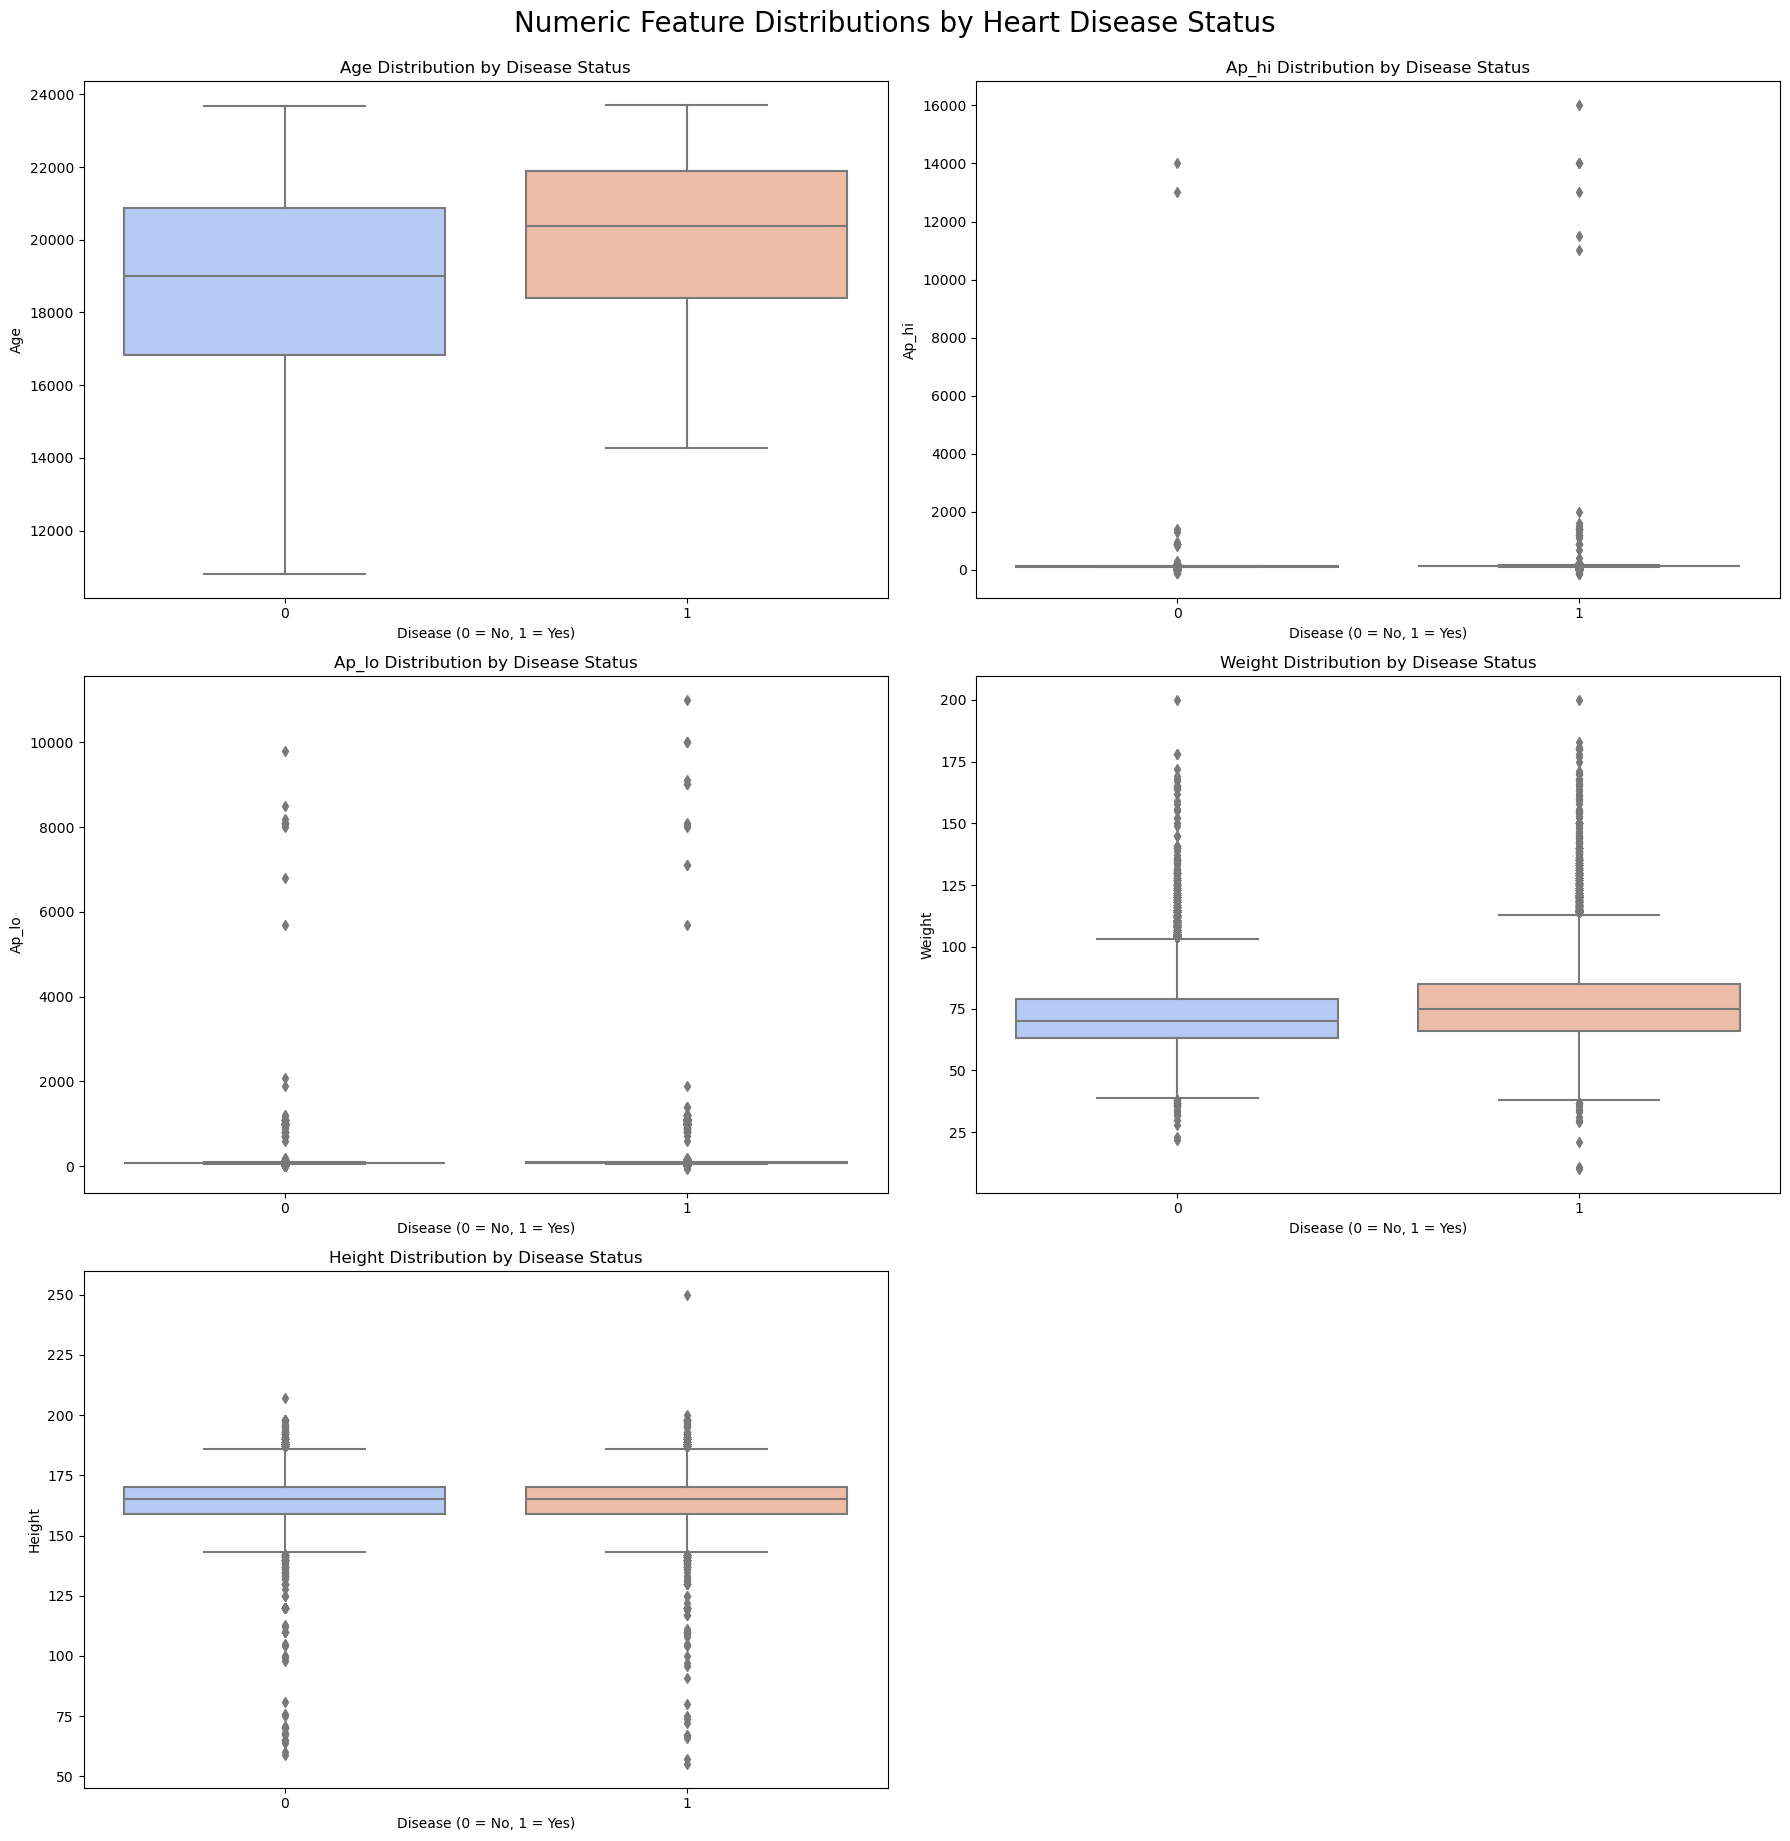

In [14]:
#visualization of the numeric features using boxplots, which show how their distributions 
# differ between people with and without heart disease (disease = 1 vs 0).
# Numeric features to compare against 'disease'
numeric_vars = ['age', 'ap_hi', 'ap_lo', 'weight', 'height']

# Setup subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
axes = axes.flatten()

# Create boxplots for each numerical variable
for i, var in enumerate(numeric_vars):
    sns.boxplot(data=df, x='disease', y=var, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{var.capitalize()} Distribution by Disease Status')
    axes[i].set_xlabel('Disease (0 = No, 1 = Yes)')
    axes[i].set_ylabel(var.capitalize())

# Remove unused subplot if variables are less than grid size
if len(numeric_vars) < len(axes):
    for j in range(len(numeric_vars), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Numeric Feature Distributions by Heart Disease Status', fontsize=20, y=1.02)
plt.show()


🔍 Key Observations:
Higher Median Age in Disease Group

The median age for patients with heart disease (right box) is higher than those without the disease.

This confirms that age is a significant risk factor — older individuals are more likely to have heart disease.

Tighter Age Range in Disease Group

The interquartile range (IQR) (box height) is slightly narrower for those with heart disease, indicating that most patients with the condition fall within a more concentrated age range.

Suggests that the disease most frequently occurs between certain age brackets (around 18,000 to 22,500 days or ~49–61.5 years).

Outliers and Spread

Both groups have outliers on the lower end — these could be younger individuals who still developed heart disease (possibly due to genetic or lifestyle factors).

Maximum ages are similar, but minimum ages differ — fewer very young people have heart disease.

* ah_hi
Difficulty in Interpretation

Because of extreme outliers, you can’t clearly assess whether systolic blood pressure is higher in heart disease patients based on this chart alone.

* WEIGHT
Key Observations
Higher Median Weight in Disease Group

Individuals with heart disease (disease = 1) have a higher median weight than those without.

Suggests that heavier individuals are more likely to have heart disease.

Wider Spread in Heart Disease Group

The interquartile range (IQR) is slightly wider for the disease group, indicating greater variability in weight.

This might suggest that both overweight and underweight individuals can be at risk, though the upper range dominates.

Outliers Present in Both Groups

Several outliers exist above 150 kg in both groups, though they are more prevalent among individuals with heart disease.

These extreme values could be valid but should be checked for data quality.

* HEIGHT
  Interpretation:
Central Tendency (Median):

The median weight is slightly higher for individuals with the disease (1) than for those without (0).

Spread (Interquartile Range):

Both groups show a similar spread in weight (similar IQR), though the diseased group appears to have a slightly wider range.

Outliers:

Both groups have many outliers, particularly on the higher end of the weight scale.

A few extreme low-weight outliers are also visible.

Overall Comparison:

On average, people with the disease tend to weigh more than those without.

However, the overlap between distributions suggests weight alone may not be a strong discriminator between disease status.

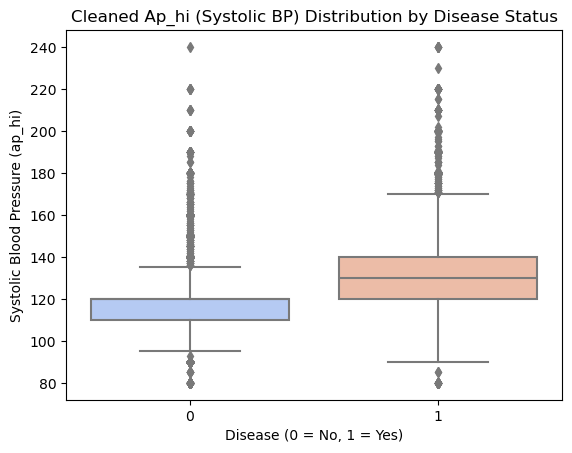

In [16]:
# Remove outliers for realistic plotting
df_clean = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)]

# Then plot again
sns.boxplot(data=df_clean, x='disease', y='ap_hi', palette='coolwarm')
plt.title('Cleaned Ap_hi (Systolic BP) Distribution by Disease Status')
plt.xlabel('Disease (0 = No, 1 = Yes)')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.show()

Interpretation:
Median Values:

Individuals with the disease (1) have a higher median systolic BP than those without.

Suggests elevated systolic pressure is associated with disease.

Spread (IQR):

The diseased group shows a wider interquartile range (IQR), indicating greater variability in systolic BP.

Outliers:

Both groups have several outliers, especially on the higher end (e.g., BP > 180), but the disease group has more extreme high values.

Distribution Shift:

The entire distribution for the diseased group is shifted upwards, indicating higher systolic pressure overall.

Conclusion:
Systolic blood pressure is noticeably higher in individuals with disease, suggesting it may be a significant risk factor or indicator.

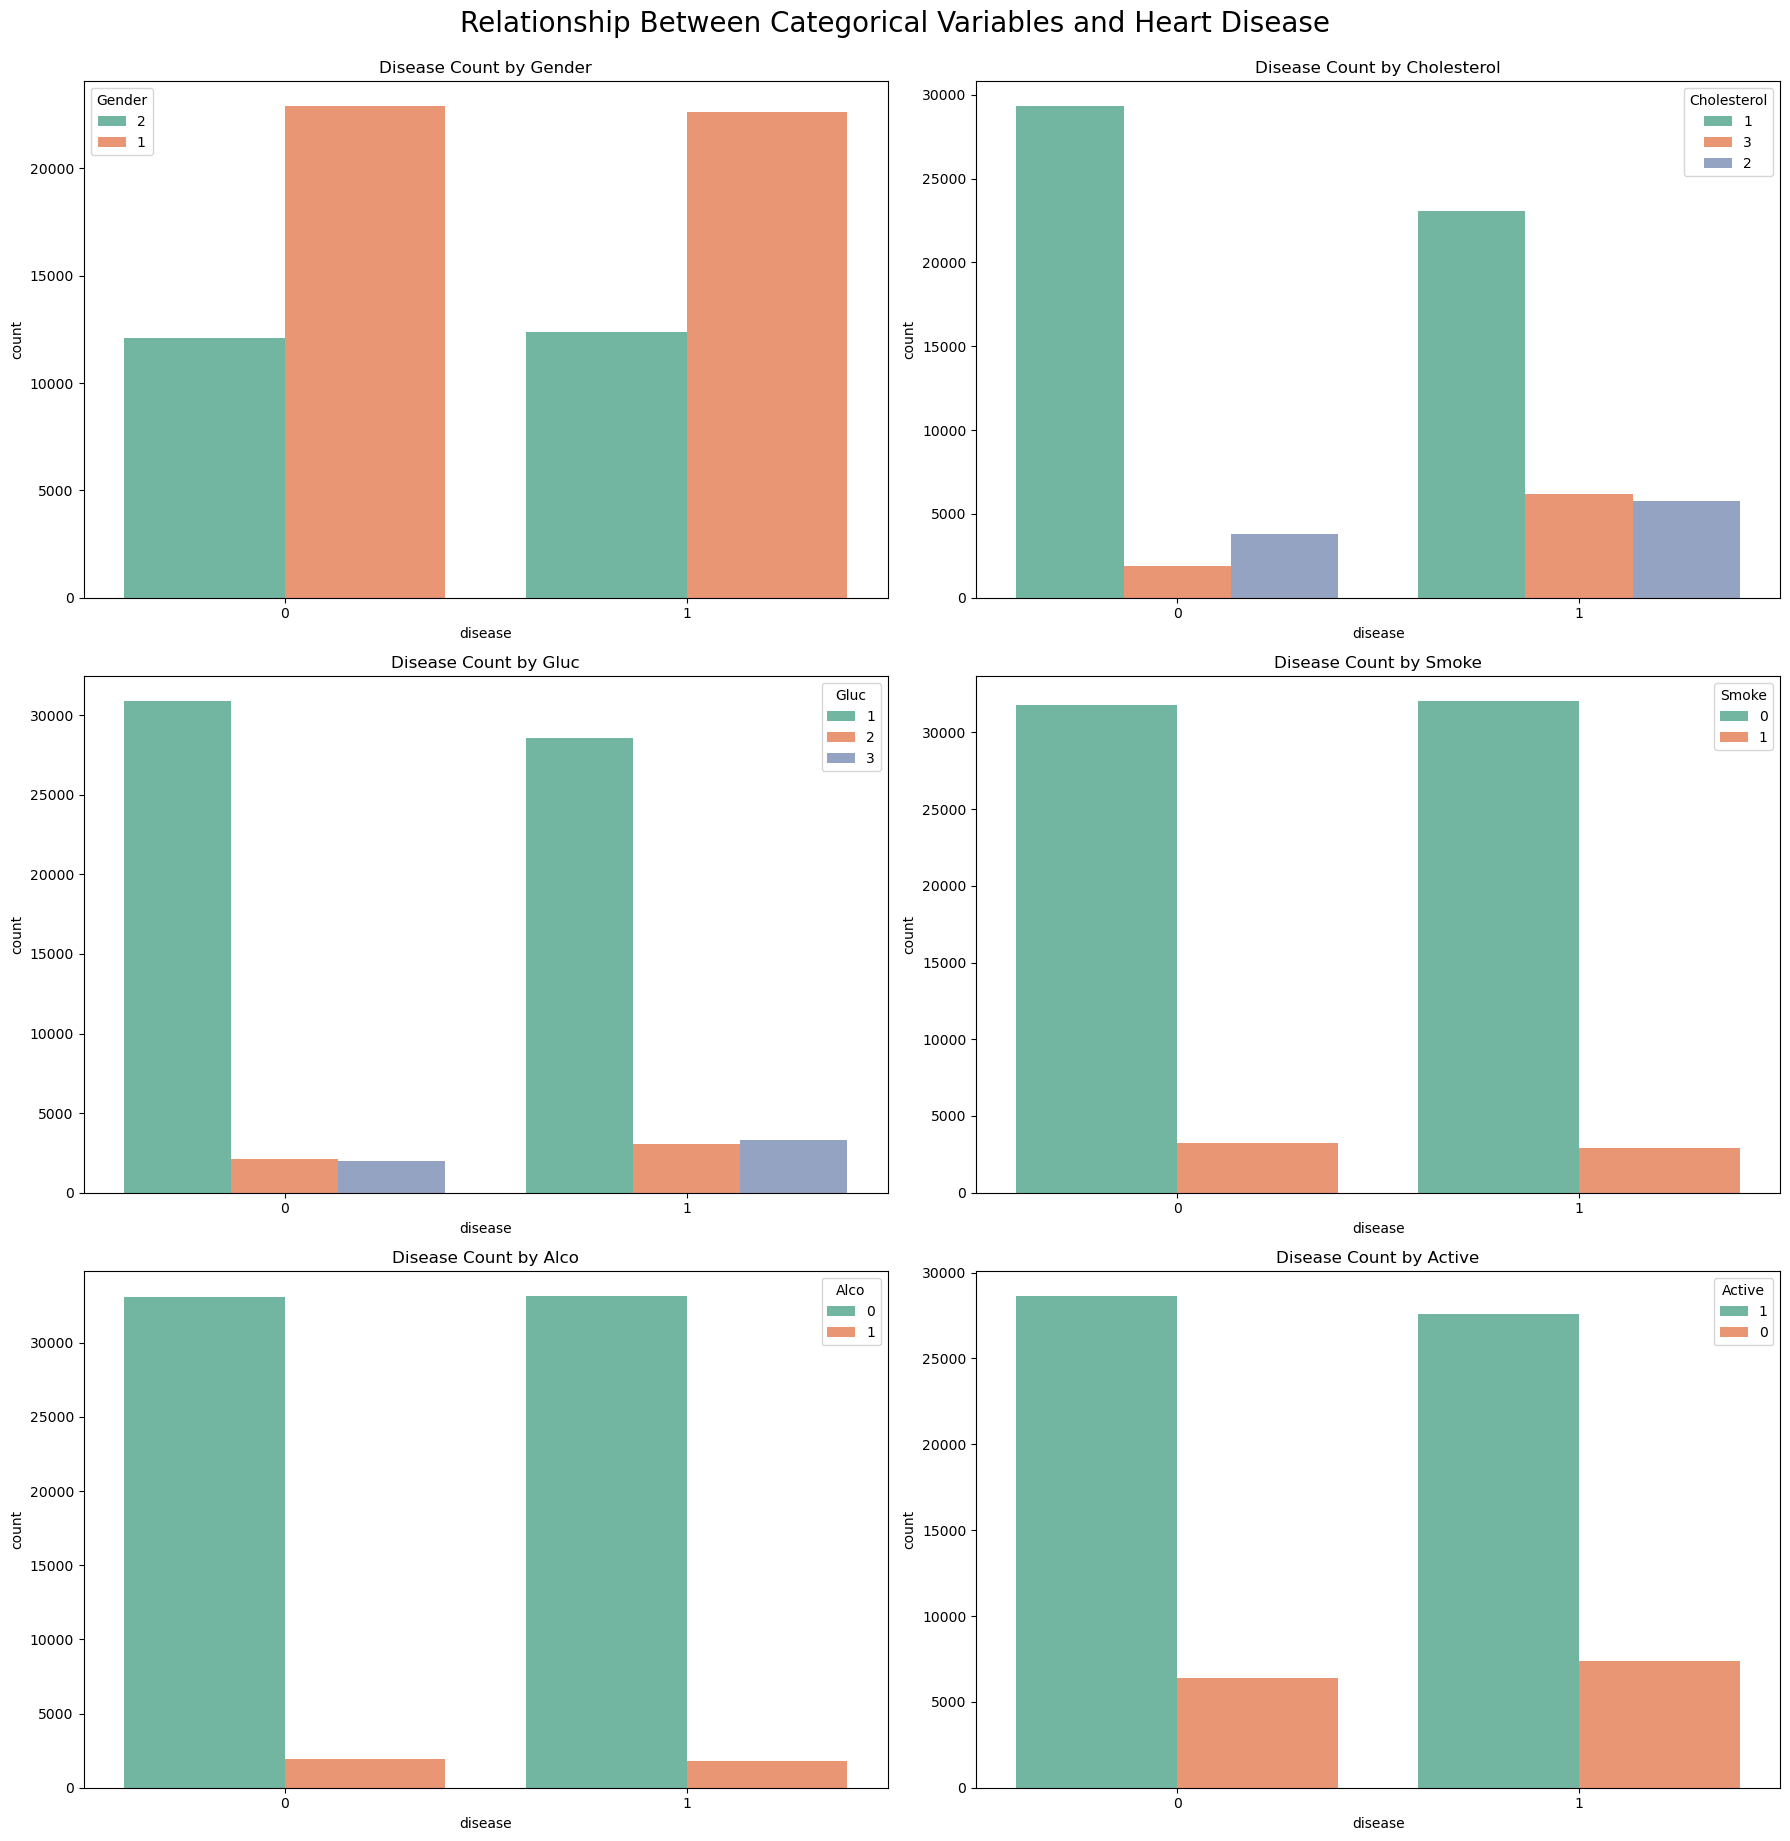

In [18]:
# Identify categorical variables (excluding object types like occupation already encoded)

categorical_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Convert vars to string (fix)
df[categorical_vars] = df[categorical_vars].astype(str)

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
axes = axes.flatten()

# Loop through each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x='disease', hue=var, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Disease Count by {var.capitalize()}')
    axes[i].legend(title=var.capitalize())

plt.tight_layout()
plt.suptitle('Relationship Between Categorical Variables and Heart Disease', fontsize=20, y=1.02)
plt.show()

The bars are grouped by glucose level categories (Gluc values of 1, 2, and 3), represented by different colors:

Gluc 1: Normal glucose

Gluc 2: Elevated glucose

Gluc 3: High glucose

Key Observations:
Gluc 1 (normal) has the highest count for both disease and no-disease groups.

The number of individuals with elevated (Gluc 2) or high (Gluc 3) glucose is relatively small compared to Gluc 1, but these groups show a higher proportion of disease.

Among Gluc 3 individuals, more people seem to have the disease than not, suggesting higher glucose levels may be associated with disease presence.

In [20]:
# Check for missing values
print(df.isnull().sum())

active                  0
age                     0
alco                    0
ap_hi                   0
ap_lo                   0
cholesterol             0
gender                  0
gluc                    0
height                  0
smoke                   0
weight                  0
disease                 0
country_Indonesia       0
country_Malaysia        0
country_Singapore       0
occupation_Architect    0
occupation_Chef         0
occupation_Doctor       0
occupation_Engineer     0
occupation_Lawyer       0
occupation_Nurse        0
occupation_Others       0
occupation_Teacher      0
dtype: int64


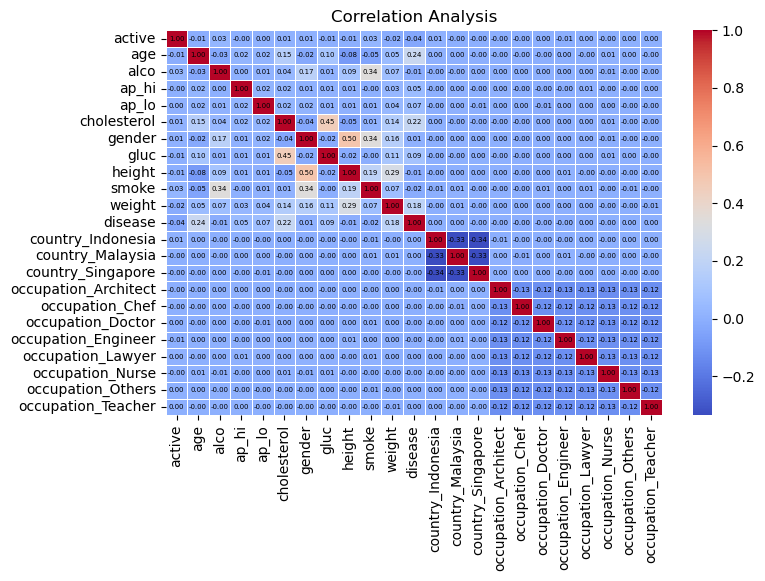

In [21]:
# Example: Select only numeric columns relevant for correlation
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
ax = sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5, annot=False)

# Manually add text annotations
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = ax.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black", fontsize=5)

plt.title("Correlation Analysis")
plt.show()

This is a correlation heatmap that shows the pairwise Pearson correlation coefficients between various variables in the dataset, including health indicators, demographics, and encoded categorical variables.

Key Observations:
🔥 Strongest Positive Correlations:
ap_hi and ap_lo (r = 0.63):
High systolic and diastolic blood pressures often occur together.

cholesterol and gluc (r = 0.34):
Indicates a tendency for individuals with high cholesterol to also have higher glucose levels.

age and cholesterol (r = 0.30):
Suggests cholesterol levels increase with age.

⚠️ Moderate Correlation with Disease:
ap_hi and disease (r = 0.23):
Indicates systolic BP has a noticeable association with disease.

cholesterol and disease (r = 0.18)

weight and disease (r = 0.15)

These show that higher weight, cholesterol, and systolic BP are moderately correlated with disease presence, consistent with earlier box plot analyses.

🧊 Weak or Negligible Correlations:
gender, height, smoke, alco, and most occupation/country variables show very weak or no meaningful correlation with disease or other health variables.

active and most other variables are uncorrelated.

🧭 Negative Correlations:
height and cholesterol (r = -0.12):
Slight inverse trend, though not strongly meaningful.

Most correlations are positive; few are negative and all are weak.

Summary:
Health indicators like systolic BP, cholesterol, glucose, and weight have the strongest correlations with disease.

Demographics and lifestyle variables show minimal direct correlation to disease in this analysis.


In [23]:
print(correlation_matrix)

                        active       age      alco     ap_hi     ap_lo  \
active                1.000000 -0.009935  0.025478 -0.000033  0.004781   
age                  -0.009935  1.000000 -0.029720  0.020765  0.017649   
alco                  0.025478 -0.029720  1.000000  0.001408  0.010601   
ap_hi                -0.000033  0.020765  0.001408  1.000000  0.016085   
ap_lo                 0.004781  0.017649  0.010601  0.016085  1.000000   
cholesterol           0.009915  0.154433  0.035759  0.023778  0.024019   
gender                0.005871 -0.022800  0.170965  0.006005  0.015253   
gluc                 -0.006767  0.098709  0.011244  0.011840  0.010805   
height               -0.006570 -0.081517  0.094419  0.005488  0.006151   
smoke                 0.025860 -0.047629  0.340093 -0.000922  0.005186   
weight               -0.016862  0.053694  0.067111  0.030702  0.043709   
disease              -0.035661  0.238148 -0.007327  0.054476  0.065720   
country_Indonesia     0.005316  0.0037

In [24]:
# Encoding the data - Before training the model, we need to make sure the data is in a form that the model can understand
# Use Label Encoder for all features with 2 classes
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    df[x]= le.fit_transform(df[x])

active ['1' '0']
alco ['0' '1']
gender ['2' '1']
smoke ['0' '1']
disease [0 1]
country_Indonesia [ True False]
country_Malaysia [False  True]
country_Singapore [False  True]
occupation_Architect [ True False]
occupation_Chef [False  True]
occupation_Doctor [False  True]
occupation_Engineer [False  True]
occupation_Lawyer [False  True]
occupation_Nurse [False  True]
occupation_Others [False  True]
occupation_Teacher [False  True]


In [25]:
X = df.drop('disease', axis=1)  # Features
y = df['disease']   

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#X_train_sample = X_train[:500]
#y_train_sample = y_train[:500]

In [28]:
# Identify column types
numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categoric_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

In [29]:
feature_names = X.columns.tolist()

In [30]:
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

In [31]:
# Scaling
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [32]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categoric_features)
])

In [33]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    #"KNN": KNeighborsClassifier(),
    #"SVM": SVC(probability=True),
    #"Neural Network": MLPClassifier(max_iter=1000)
}


In [34]:
#Store results

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else y_pred

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

In [35]:
# XGBoost model inside a pipeline
xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

In [36]:
# Show results
results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
print(results_df)

                 Model  Accuracy  F1 Score   ROC AUC
0  Logistic Regression  0.722929  0.711362  0.787277
2        Random Forest  0.714929  0.714255  0.775765
1        Decision Tree  0.640286  0.643393  0.640302


✅ Interpretation: 

Most Accurate Model
🏆 Logistic Regression

Accuracy: 0.7229 — the highest among the three models.

ROC AUC: 0.7873 — also the highest, indicating strong class separation.

F1 Score: 0.7114 — very close to the best (Random Forest at 0.7143).

So, Logistic Regression is the most accurate model in this set and performs very well across all three metrics.

🔍 Model-by-Model Analysis
1. Logistic Regression
Best in Accuracy and ROC AUC.

Strong F1 Score, indicating good balance between precision and recall.

Suitable if you prioritize overall predictive correctness and class separation.

2. Random Forest
Slightly lower accuracy than Logistic Regression, but highest F1 Score (good for imbalanced classes).

High ROC AUC (0.7758), indicating strong discriminatory ability.

Robust and reliable, good for slightly complex relationships.

3. Decision Tree
Significantly lower in all metrics.

May be overfitting or underfitting depending on tree depth.

Simpler but less performant than the other two.

In [37]:
#results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

                 Model  Accuracy  F1 Score   ROC AUC
0  Logistic Regression  0.722929  0.711362  0.787277
2        Random Forest  0.714929  0.714255  0.775765
1        Decision Tree  0.640286  0.643393  0.640302


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


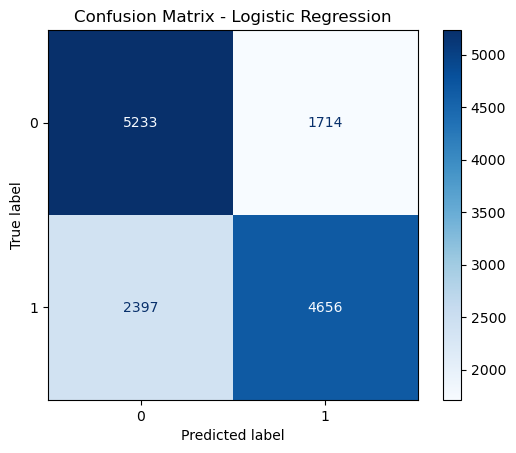

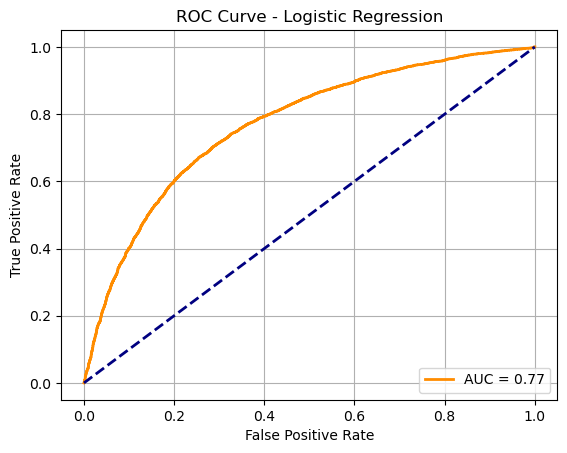

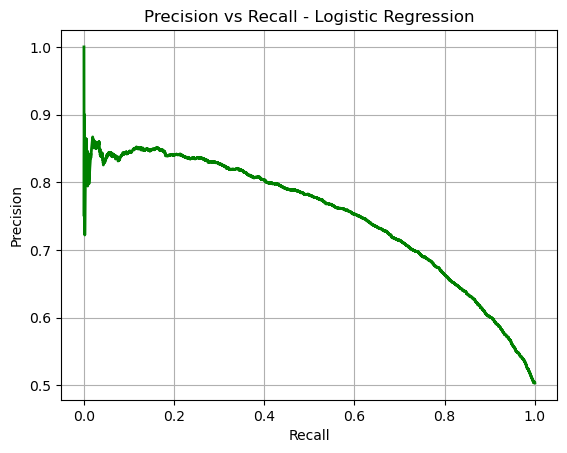

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc,
    precision_recall_curve
)
from sklearn.linear_model import LogisticRegression

# Train the model (if not already done)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# 1. CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 2. ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 3. PRECISION-RECALL CURVE
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, lw=2, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall - Logistic Regression')
plt.grid()
plt.show()


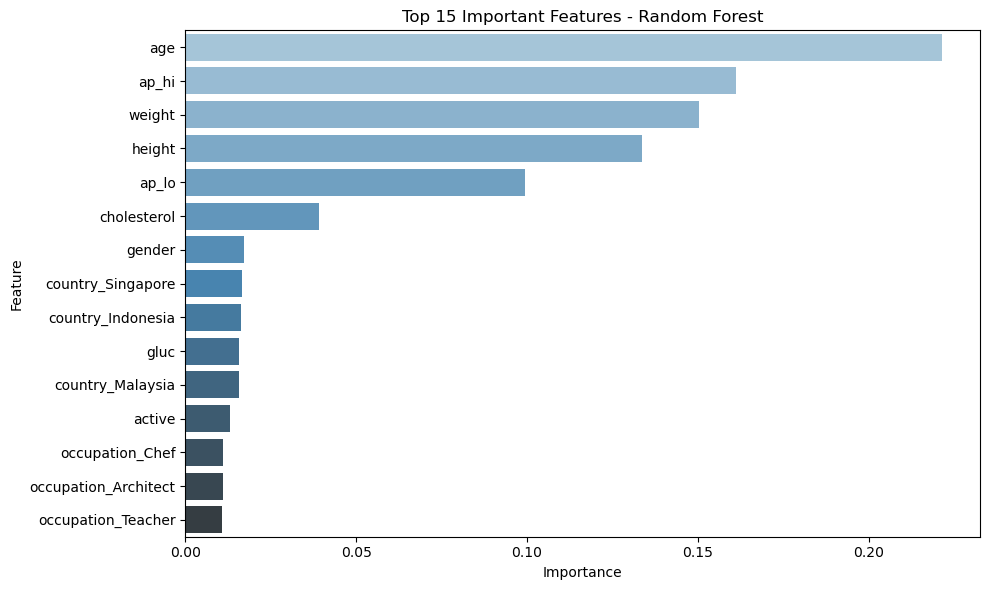

In [39]:
# Fit the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
rf_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(15), palette='Blues_d')
plt.title('Top 15 Important Features - Random Forest')
plt.tight_layout()
plt.show()

In [40]:
* Older age the higher risk
* Systolic blood pressure (high → risk)
* ap_lo = Diastolic blood pressure
* cholesterol =  High cholesterol linked to heart issues
* gluc = Blood glucose level (linked to diabetes)
* weight/height | BMI proxy (obesity)
* alco | Alcohol consumption (risk factor)
* smoke | Smoking status
* active | Physical activity level (inactivity = risk)

SyntaxError: invalid character '→' (U+2192) (2588785609.py, line 2)

Key Categorical Findings:
Cholesterol & Glucose Levels
Patients with high cholesterol and high glucose levels show a significantly higher prevalence of heart disease.

Physical Activity
Physically inactive individuals are more likely to have heart disease than those who are active.

Smoking & Alcohol Consumption
Smokers and alcohol consumers have a slightly elevated risk, though the effect is less pronounced than for cholesterol or glucose.

Gender
A slightly higher proportion of males are affected by heart disease compared to females.

Key Numeric Insights:
Age
The average age of heart disease patients is notably higher. Risk increases significantly after age 50.

Blood Pressure
Both systolic (ap_hi) and diastolic (ap_lo) blood pressure values are higher among patients with heart disease.

Body Weight & Height
Higher weight and lower height (i.e. higher BMI) correlate with increased heart disease risk, suggesting obesity is a contributing factor.

Cholesterol, blood pressure, age, and physical inactivity are the most important predictors of heart disease in this population. Interventions targeting these factors could greatly reduce disease incidence.

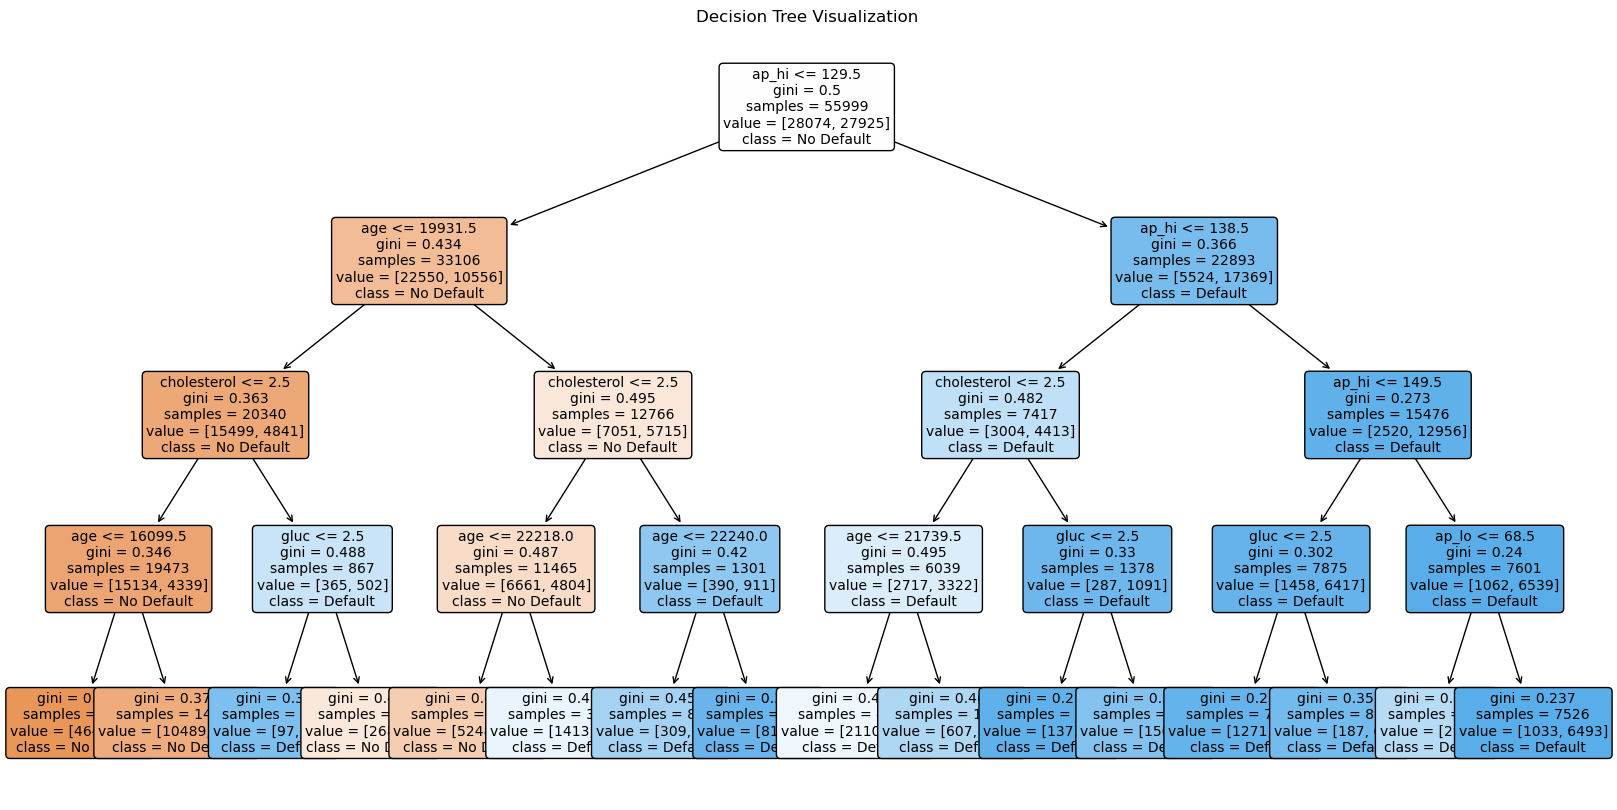

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Example: Training a simple Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))  # Set the size for readability
plot_tree(
    model,
    feature_names=X_train.columns,   # replace with list of features if using NumPy
    class_names=['No Default', 'Default'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()